# Challenge

## WADE El Hadji Malick

In [1]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns
import math
from random import *


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
import xgboost

from sklearn.metrics import auc, log_loss, recall_score, precision_score, classification_report, confusion_matrix, f1_score, matthews_corrcoef, accuracy_score, roc_auc_score,roc_curve

import sklearn.metrics

import warnings

# On ignore les avertissements des classes de modéles
warnings.filterwarnings("ignore", category=DeprecationWarning)

# On sauvegarde nos modéles finales
from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

## 1. Chargement et Data preprocessing

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

path_Home = "/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/data_challenge"
#path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

Xtrainchallenge = pd.read_csv(path_Home + "/Xtrainchallenge.txt",  sep=' ')
Ytrainchallenge = pd.read_csv(path_Home + "/Ytrainchallenge.txt",  sep=' ')

Xtestchallenge = pd.read_csv(path_Home + "/Xtestchallenge.txt",  sep=' ')

In [3]:
print("Données Train:")
print ("Lignes: " ,Xtrainchallenge.shape[0])
print ("Colonnes: " ,Xtrainchallenge.shape[1])

print("----")

print("Données Test:")
print ("Lignes: " ,Xtestchallenge.shape[0])
print ("Colonnes: " ,Xtestchallenge.shape[1])

Données Train:
Lignes:  1000
Colonnes:  500
----
Données Test:
Lignes:  1000
Colonnes:  500


In [4]:
Xtrainchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [5]:
Xtestchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1001,482,538,473,485,576,479,489,477,473,479,495,527,439,485,465,523,477,466,502,478,479,466,484,481,492,465,478,481,469,488,472,551,521,536,472,510,499,513,475,476,476,476,507,493,523,446,492,513,498,452,601,482,476,478,524,473,461,501,588,466,487,487,491,483,453,544,504,477,484,477,520,494,492,475,476,522,474,471,461,487,511,524,409,467,510,517,474,478,483,561,476,460,457,527,483,543,484,449,484,498,466,478,482,477,480,462,473,558,535,485,490,491,482,473,530,493,463,489,488,473,477,484,486,505,437,497,501,499,476,435,476,490,473,475,427,513,505,475,480,476,496,527,489,479,464,495,477,510,485,512,430,489,465,432,476,498,503,448,481,469,476,480,488,477,485,492,475,482,475,545,478,554,422,479,475,444,501,479,486,497,508,513,478,487,499,474,499,493,489,471,486,494,486,444,525,478,471,484,476,484,519,498,527,555,498,474,473,481,467,478,511,467,470,485,481,501,549,473,532,484,447,539,510,535,522,463,492,477,477,493,490,481,471,485,445,519,502,473,469,489,485,562,458,464,540,482,463,472,475,529,508,499,482,503,477,438,487,423,491,512,485,479,485,443,485,502,447,517,551,504,495,517,510,512,469,499,476,522,468,419,476,439,460,475,537,471,502,544,483,469,478,537,541,474,489,532,507,489,484,483,480,491,475,463,512,477,463,487,510,459,491,478,559,493,462,462,470,471,449,466,483,494,489,489,484,483,465,489,482,538,532,470,476,491,571,487,422,546,526,472,542,469,471,554,507,476,488,563,496,484,477,493,452,494,488,455,495,478,491,514,446,496,495,506,475,461,504,486,482,523,484,462,507,480,506,497,476,522,518,446,475,452,498,479,503,461,537,477,477,440,466,472,478,508,481,507,489,487,519,474,47

In [6]:
# On regroupe les données
Xchallenge = pd.concat([Xtrainchallenge,Xtestchallenge])
Xchallenge.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,V340,V341,V342,V343,V344,V345,V346,V347,V348,V349,V350,V351,V352,V353,V354,V355,V356,V357,V358,V359,V360,V361,V362,V363,V364,V365,V366,V367,V368,V369,V370,V371,V372,V373,V374,V375,V376,V377,V378,V379,V380,V381,V382,V383,V384,V385,V386,V387,V388,V389,V390,V391,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V412,V413,V414,V415,V416,V417,V418,V419,V420,V421,V422,V423,V424,V425,V426,V427,V428,V429,V430,V431,V432,V433,V434,V435,V436,V437,V438,V439,V440,V441,V442,V443,V444,V445,V446,V447,V448,V449,V450,V451,V452,V453,V454,V455,V456,V457,V458,V459,V460,V461,V462,V463,V464,V465,V466,V467,V468,V469,V470,V471,V472,V473,V474,V475,V476,V477,V478,V479,V480,V481,V482,V483,V484,V485,V486,V487,V488,V489,V490,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
1,485,477,537,479,452,471,491,476,475,473,455,500,456,507,478,491,447,422,480,482,515,482,464,484,477,496,509,491,459,482,483,505,508,458,509,517,479,487,473,472,474,531,485,508,517,489,507,515,440,465,550,532,450,483,460,469,507,485,479,458,516,480,460,479,648,480,561,481,474,474,544,484,490,451,494,480,486,459,521,500,466,457,494,492,488,497,477,461,473,464,476,471,481,507,474,500,481,536,464,501,479,480,483,462,470,181,510,470,431,482,496,481,469,539,491,482,481,476,533,495,474,485,479,495,465,541,493,488,452,481,491,501,477,479,503,529,540,504,482,463,477,530,508,488,488,474,479,506,478,511,501,474,483,575,478,482,461,480,543,415,527,477,487,486,511,474,477,482,476,516,466,492,561,479,472,457,497,475,452,491,477,454,461,472,481,490,526,490,459,478,461,516,511,544,519,487,485,475,477,476,478,470,493,581,484,476,521,474,492,459,487,504,464,485,478,465,603,475,481,491,555,424,528,511,384,525,459,478,477,539,479,508,471,517,482,518,473,478,506,476,507,434,466,480,547,518,516,476,492,454,463,497,477,531,472,495,532,496,492,480,480,479,517,470,470,500,468,477,486,553,490,499,450,469,466,479,476,401,491,551,477,517,492,475,537,516,472,451,484,471,469,523,496,482,458,487,477,457,458,493,458,517,478,482,474,517,482,488,490,485,440,455,464,531,483,467,494,488,414,491,494,497,501,476,481,485,478,476,491,492,523,492,476,464,496,473,658,507,628,484,468,448,502,618,438,486,496,535,452,497,490,485,504,477,481,473,517,476,479,483,482,458,464,466,473,482,497,479,497,495,489,483,500,490,479,471,468,496,419,513,475,471,514,479,480,486,480,477,494,454,480,539,477,441,482,461,484,510,475,485,480,4

In [7]:
print("Données Total:")
print ("Lignes: " ,Xchallenge.shape[0])
print ("Colonnes: " ,Xchallenge.shape[1])

Données Total:
Lignes:  2000
Colonnes:  500


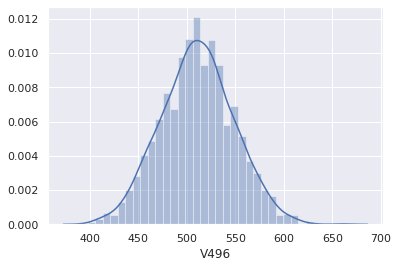

In [8]:
import scipy.stats as stats
import pylab 

col1 =  choice(Xchallenge.columns) # on choisit une variable au hasard

sns.set(style="darkgrid")
sns.distplot(Xchallenge[col1])

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([398, 403, 407, ..., 623, 627, 661])),
 (37.492726015927865, 510.893, 0.9996305800571106))

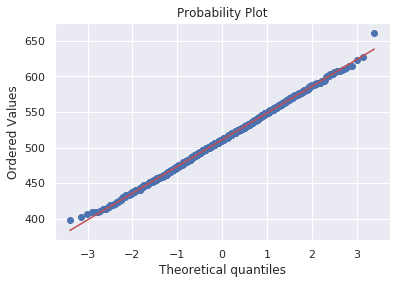

In [9]:
stats.probplot(Xchallenge[col1], dist="norm", plot=pylab)

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(Xchallenge[col1])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('la variable semble être Gaussien (on ne rejette pas H0)')
else:
    print('La variable ne semble pas être Gaussien (On rejette H0)')

Statistics=0.999, p=0.600
la variable semble être Gaussien (on ne rejette pas H0)


In [11]:
nombre_de_variable_gaussienne = 0

for col in list(Xchallenge.columns):
    stat, p = shapiro(Xchallenge[col])
    
    if p < 0.05:
        nombre_de_variable_gaussienne += 1
        
print("Nombre de variables non gaussiennes par le test de Shapiro: ",nombre_de_variable_gaussienne)

Nombre de variables non gaussiennes par le test de Shapiro:  210


## 2. Features selection 

#### a. VarianceThreshold 

In [12]:
variance = 1

Col = Xchallenge.var() > variance
Col = [i for i in Col.index if Col[i]==True]

Col = list(set(Col))
Col.sort()

print("Il y'a",Xchallenge.shape[1] - len(Col),"variables avec une variance inférieure à 1")
print("Nous décidons de les écarter car elles n'apportent aucune information(variance)")

Il y'a 6 variables avec une variance inférieure à 1
Nous décidons de les écarter car elles n'apportent aucune information(variance)


In [13]:
# on supprime les variables avec une faible variance en gardant un jeu de données initiales

Xtrainchallenge_init = Xtrainchallenge.copy()
Xtestchallenge_init = Xtestchallenge.copy()

Xtrainchallenge = Xtrainchallenge[Col] 
Xtestchallenge = Xtestchallenge[Col] 

#### b. RFECV

In [14]:
from sklearn.feature_selection import RFECV

In [15]:
X = Xtrainchallenge
y = Ytrainchallenge

##### RFECV / Séléction de variables avec Decision Tree 

In [16]:
# les métriques de sklearn
sklearn.metrics.SCORERS.keys() 

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [17]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=DecisionTreeClassifier(), step=1, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)
rfecv.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 494 features.
Fitting estimator with 493 features.
Fitting estimator with 492 features.
Fitting estimator with 491 features.
Fitting estimator with 490 features.
Fitting estimator with 489 features.
Fitting estimator with 488 features.
Fitting estimator with 487 features.
Fitting estimator with 486 features.
Fitting estimator with 485 features.
Fitting estimator with 484 features.
Fitting estimator with 483 features.
Fitting estimator with 482 features.
Fitting estimator with 481 features.
Fitting estimator with 480 features.
Fitting estimator with 479 features.
Fitting estimator with 478 features.
Fitting estimator with 477 features.
Fitting estimator with 476 features.
Fitting estimator with 475 features.
Fitting estimator with 474 features.
Fitting estimator with 473 features.
Fitting estimator with 472 features.
Fitting estimator with 471 features.
Fitting estimator with 470 features.
Fitting estimator with 469 features.
Fitting estimator with 468 features.
F

Fitting estimator with 272 features.
Fitting estimator with 271 features.
Fitting estimator with 270 features.
Fitting estimator with 269 features.
Fitting estimator with 268 features.
Fitting estimator with 267 features.
Fitting estimator with 266 features.
Fitting estimator with 265 features.
Fitting estimator with 264 features.
Fitting estimator with 263 features.
Fitting estimator with 262 features.
Fitting estimator with 261 features.
Fitting estimator with 260 features.
Fitting estimator with 259 features.
Fitting estimator with 258 features.
Fitting estimator with 257 features.
Fitting estimator with 256 features.
Fitting estimator with 255 features.
Fitting estimator with 254 features.
Fitting estimator with 253 features.
Fitting estimator with 252 features.
Fitting estimator with 251 features.
Fitting estimator with 250 features.
Fitting estimator with 249 features.
Fitting estimator with 248 features.
Fitting estimator with 247 features.
Fitting estimator with 246 features.
F

Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 fe

RFECV(cv=5,
      estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=None,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=-1, scoring='f1_micro', step=1,
      verbose=10)

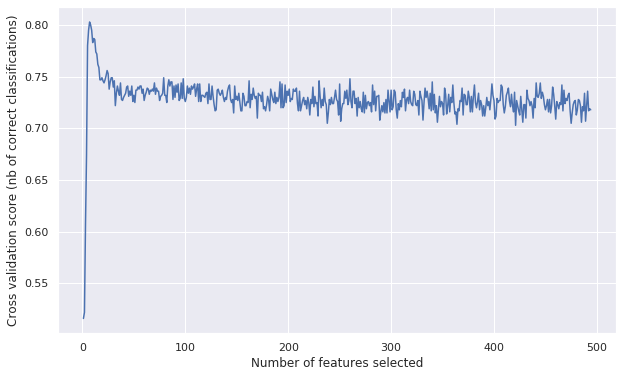

In [18]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [19]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 7
Selected features: ['V106', 'V154', 'V29', 'V339', 'V379', 'V443', 'V476']


In [20]:
DT_Selected_features = list(X.columns[rfecv.support_]) # les 7 variables selectionnées

X = X[DT_Selected_features]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=314)

In [22]:
parameters = {
    "criterion": ["gini", "entropy"],
    "max_depth":np.arange(5, 13, dtype=int),
    "min_samples_split": [2, 0.001, 0.005, 0.01, 0.02],
    "min_samples_leaf": [0.001, 0.0025, 0.005, 0.01, 0.02],
    "min_impurity_decrease" : [0.001,0.0015,0.002,0.005,0.01],
    "max_features": [0.5, 0.75, 1., "sqrt"]
}

clf_DT = GridSearchCV(DecisionTreeClassifier(), parameters, scoring ="f1_micro", cv=5, n_jobs=-1,verbose=8)

clf_DT.fit(X_train, y_train)

Fitting 5 folds for each of 8000 candidates, totalling 40000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1142 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1732 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 2402 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 3172 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 4022 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 4972 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 6002 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 7132 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 8342 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 9652 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 11042 tasks      |

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12]),
      

In [23]:
print("Train: ",round(clf_DT.score(X_train, y_train), 2))
print("Test: ",round(clf_DT.score(X_test, y_test), 2))
print("\n")
print(clf_DT.best_params_)

Train:  0.95
Test:  0.81


{'criterion': 'gini', 'max_depth': 12, 'max_features': 1.0, 'min_impurity_decrease': 0.0015, 'min_samples_leaf': 0.001, 'min_samples_split': 0.01}


In [24]:
y_DT = clf_DT.predict(X_test)
print(classification_report(y_test, y_DT))

              precision    recall  f1-score   support

          -1       0.87      0.73      0.80       128
           1       0.76      0.89      0.82       122

    accuracy                           0.81       250
   macro avg       0.82      0.81      0.81       250
weighted avg       0.82      0.81      0.81       250



In [25]:
print(confusion_matrix(y_test, y_DT))

[[ 94  34]
 [ 14 108]]


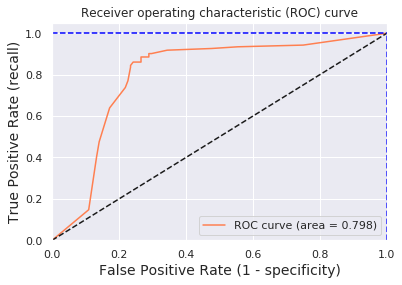

Using a threshold of 0.000 guarantees a sensitivity of 1.000 and a specificity of 0.000, i.e. a false positive rate of 100.00%.


In [26]:
y_pred = y_DT
y_pred_proba = clf_DT.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# print('Train/Test split results:')
# print("accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# print(logreg.__class__.__name__+"log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### b.Application à XGBOOST et création de métrique

https://xgboost.readthedocs.io/en/latest/parameter.html

In [27]:
def Score_Malick(y_pred, dtrain):
    
    """XGBoost_eval_metric ne dispose pas du métrique f1_score, on le crée"""
    
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred))
    return 'Score_Malick', err

In [28]:
# parameters = {
#     "eta" : np.arange(0.01, 0.35, 0.05),
#     "lambda" : np.arange(1, 2, 0.25),
#     "subsample" : np.arange(0.5, 1, 0.1),
#     "colsample_bytree": np.arange(0.5, 1.1, 0.25),
#     "learning_rate":  [0.001, 0.005, 0.01, 0.05, 0.1],
#     "max_depth":np.arange(5, 11, dtype=int),
#     "max_features":[0.5, 1.0],
#     "n_estimators" : [200, 400, 500],
#     "eval_metric" : ["error"], 
#     'objective': ['binary:logistic']
#     }

In [29]:
# clf_XGB = GridSearchCV(XGBClassifier(), parameters, cv=5, n_jobs=-1,verbose=10)

# eval_set = [(X_test, y_test)]
                    
# clf_XGB.fit(X_train, y_train, early_stopping_rounds=25, eval_metric=Score_Malick, eval_set=eval_set, verbose=True)

In [30]:
# # On sauvegarde le modéle
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_3'
# joblib.dump(clf_XGB, filename)

# # On charge le modéle sauvegardé
# filename = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Modeles/clf_XGBOOST_3'
# clf_XGB = joblib.load(filename)

In [31]:
# print("Train: ",clf_XGB.score(X_train, y_train))
# print("Test: ",clf_XGB.score(X_test, y_test))
# print("\n")
# print(clf_XGB.best_params_)

In [32]:
# y_XGB = clf_XGB.predict(X_test)
# print(classification_report(y_test, y_XGB))

In [33]:
# y_pred = y_XGB
# y_pred_proba = clf_XGB.predict_proba(X_test)[:, 1]
# [fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# # print('Train/Test split results:')
# # print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# # print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# # print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

# plt.figure()
# plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
# plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
# plt.ylabel('True Positive Rate (recall)', fontsize=14)
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

# print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
#       "and a specificity of %.3f" % (1-fpr[idx]) + 
#       ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [34]:
# y_XGB = clf_XGB.predict(Xtestchallenge[DT_Selected_features])
# np.savetxt('/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_3.txt', np.transpose(y_XGB),fmt='% 0d')

In [35]:
# meilleur_model = clf_XGB.best_estimator_
# meilleur_model.fit(Xtrainchallenge[DT_Selected_features], Ytrainchallenge, early_stopping_rounds=25, eval_metric="error", eval_set=eval_set, verbose=True)

In [36]:
# # plot feature importance
# xgboost.plot_importance(meilleur_model)
# plt.show()

In [37]:
# y_meilleur = meilleur_model.predict(Xtestchallenge[DT_Selected_features])
# np.savetxt('/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_31.txt', np.transpose(y_meilleur),fmt='% 0d')

## 2. Data Analyse

In [38]:
print(DT_Selected_features)

['V106', 'V154', 'V29', 'V339', 'V379', 'V443', 'V476']


#### a. Pairplot

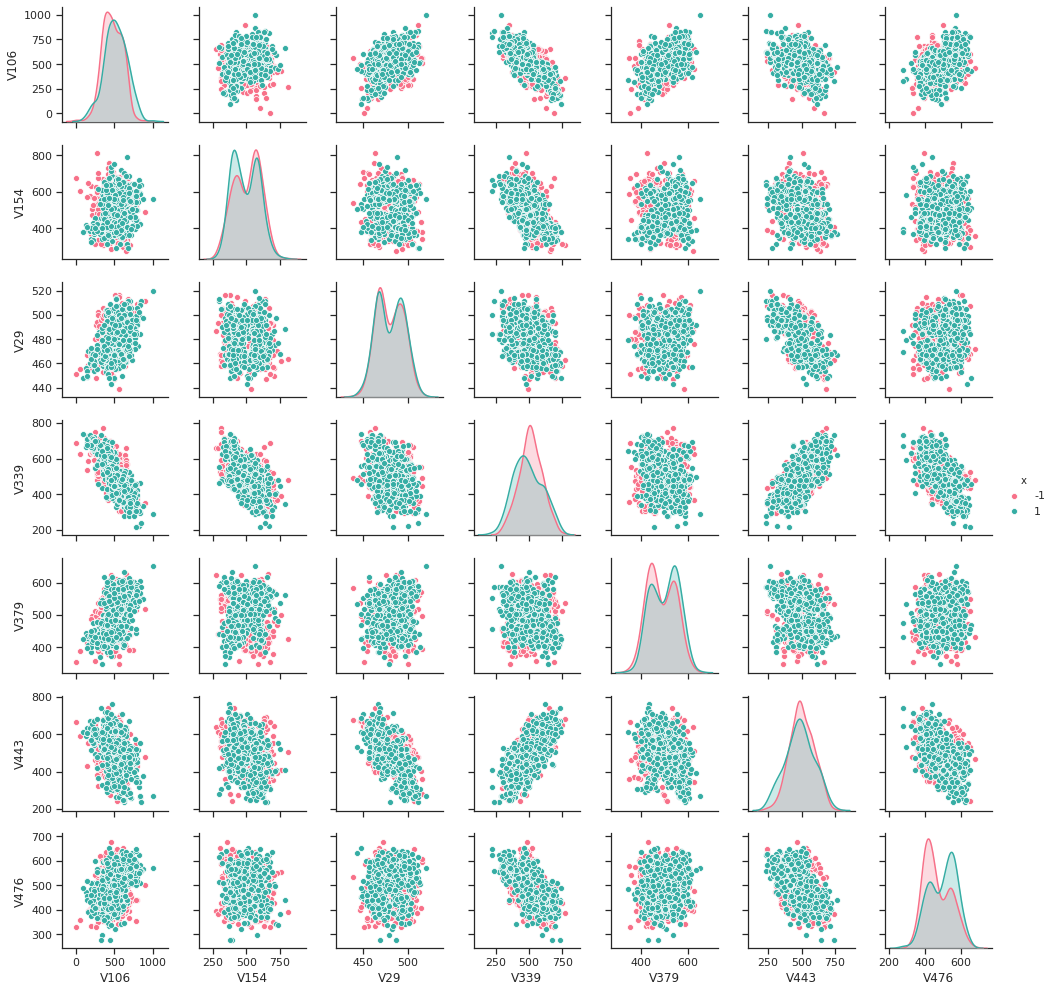

In [39]:
sns.set(style="ticks", color_codes=True)
Pairplot = pd.concat([X, y], axis=1)
g = sns.pairplot(Pairplot, vars=DT_Selected_features, hue="x", height=2, palette="husl")
g

#### b. Corrélation

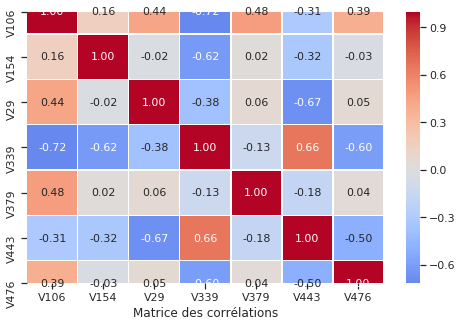

In [40]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(),cmap='coolwarm', annot_kws={"size": 11}, annot=True, fmt=".2f",vmax=1,
     center=0, linewidths=.5)
plt.xlabel("Matrice des corrélations")
plt.show()

#### c. Boxplot

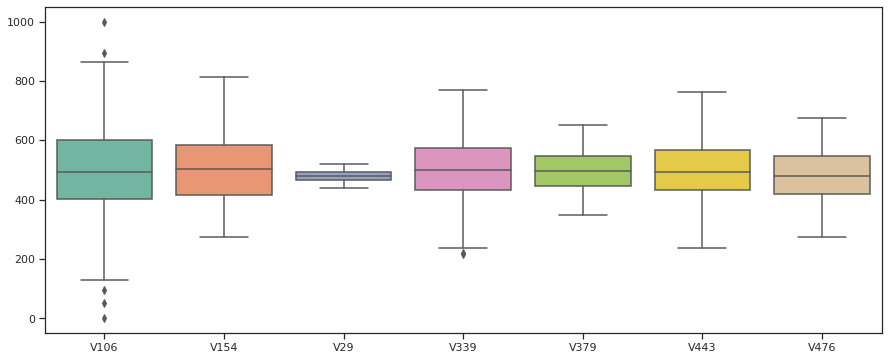

In [41]:
plt.subplots(figsize=(15, 6))
ax = sns.boxplot(data=X, orient="v", palette="Set2")

#### c. Normalité / Test de shapiro

In [42]:
for col in DT_Selected_features:
    stat, p = shapiro(X[col])
    print(col,":")
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print("On ne rejette pas H0: la variable",col,"semble être Gaussien")
    else:
        print("On rejette H0: la variable",col,"ne semble pas être Gaussien")
    print("")

V106 :
Statistics=0.998, p=0.166
On ne rejette pas H0: la variable V106 semble être Gaussien

V154 :
Statistics=0.973, p=0.000
On rejette H0: la variable V154 ne semble pas être Gaussien

V29 :
Statistics=0.974, p=0.000
On rejette H0: la variable V29 ne semble pas être Gaussien

V339 :
Statistics=0.996, p=0.006
On rejette H0: la variable V339 ne semble pas être Gaussien

V379 :
Statistics=0.972, p=0.000
On rejette H0: la variable V379 ne semble pas être Gaussien

V443 :
Statistics=0.996, p=0.006
On rejette H0: la variable V443 ne semble pas être Gaussien

V476 :
Statistics=0.970, p=0.000
On rejette H0: la variable V476 ne semble pas être Gaussien



In [43]:
Selected_features = DT_Selected_features
if len (DT_Selected_features) == 8:
    Selected_features.remove("V29")
print("Les variables finales selectionnées:",Selected_features)

Les variables finales selectionnées: ['V106', 'V154', 'V29', 'V339', 'V379', 'V443', 'V476']


## 4. Modèles de prédiction

#### a. XGBoost avec paramétres simples

In [56]:
X = Xtrainchallenge[Selected_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=124)

In [57]:
# on choisit de modifier le paramétre colsample_bytree, qui valait 0.75 sans doute à cause de la linéarité des deux variables
myXGBoost = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01, 
              eval_metric='error', gamma=0, Lambda=1.0, learning_rate=0.05,
              max_delta_step=0, max_depth=10, max_features=0.5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [58]:
# XGBoost_eval_metric = {"error", "auc", "aucpr", "mlogloss"} et {"Score_Malick"}

In [59]:
eval_set = [(X_test, y_test)]
                    
myXGBoost.fit(X_train, y_train, early_stopping_rounds=25, eval_metric=Score_Malick, eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.24	validation_0-Score_Malick:0.241935
Multiple eval metrics have been passed: 'validation_0-Score_Malick' will be used for early stopping.

Will train until validation_0-Score_Malick hasn't improved in 25 rounds.
[1]	validation_0-error:0.228	validation_0-Score_Malick:0.22179
[2]	validation_0-error:0.236	validation_0-Score_Malick:0.251064
[3]	validation_0-error:0.208	validation_0-Score_Malick:0.213115
[4]	validation_0-error:0.232	validation_0-Score_Malick:0.245763
[5]	validation_0-error:0.212	validation_0-Score_Malick:0.219917
[6]	validation_0-error:0.184	validation_0-Score_Malick:0.190083
[7]	validation_0-error:0.172	validation_0-Score_Malick:0.178423
[8]	validation_0-error:0.184	validation_0-Score_Malick:0.190083
[9]	validation_0-error:0.172	validation_0-Score_Malick:0.174089
[10]	validation_0-error:0.168	validation_0-Score_Malick:0.173554
[11]	validation_0-error:0.168	validation_0-Score_Malick:0.173554
[12]	validation_0-error:0.152	validation_0-Score_Malick:0

XGBClassifier(Lambda=1.0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.01,
              eval_metric='error', gamma=0, learning_rate=0.05,
              max_delta_step=0, max_depth=10, max_features=0.5,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [60]:
print("Train: ",round(myXGBoost.score(X_train, y_train),2))
print("Test: ",round(myXGBoost.score(X_test, y_test),2))

Train:  0.94
Test:  0.86


In [61]:
y_myXGB = myXGBoost.predict(X_test)
print(classification_report(y_test, y_myXGB))

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86       128
           1       0.85      0.85      0.85       122

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250



In [62]:
print(confusion_matrix(y_test, y_myXGB))

[[110  18]
 [ 18 104]]


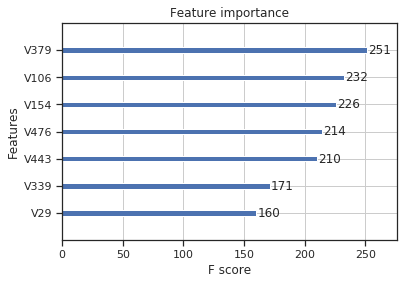

In [63]:
# plot feature importance
xgboost.plot_importance(myXGBoost, max_num_features=10)
plt.show()

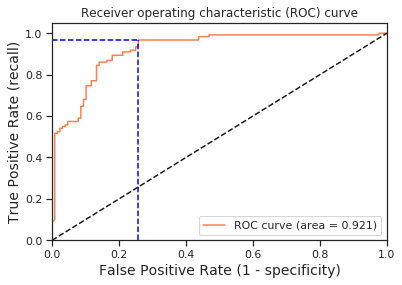

Using a threshold of 0.439 guarantees a sensitivity of 0.967 and a specificity of 0.742, i.e. a false positive rate of 25.78%.


In [64]:
y_pred = y_myXGB
y_pred_proba = myXGBoost.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
# print('Train/Test split results:')
# print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
# print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
# print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

##### conclusion: 

In [65]:
y_XGBoost_Version_4 = myXGBoost.predict(Xtestchallenge[Selected_features]) # données de Challenge

path_XGBoost_Version_4 = '/home/jovyan/work/Projets/Projets/Statistique_en_grande_dimension/Challenges/WADE_XGBoost_Version_4.txt'

np.savetxt(path_XGBoost_Version_4, np.transpose(y_XGBoost_Version_4),fmt='% 0d')

#### b. XGBoost tunning avec "hyperopt"

In [66]:
# parameters = {
#     "eta" : np.arange(0.01, 0.35, 0.05),
#     "lambda" : np.arange(1, 2, 0.25),
#     "subsample" : np.arange(0.5, 1, 0.1),
#     "colsample_bytree": np.arange(0.5, 1.1, 0.25),
#     "learning_rate":  [0.001, 0.005, 0.01, 0.05, 0.1],
#     "max_depth":np.arange(5, 11, dtype=int),
#     "max_features":[0.5, 1.0],
#     "n_estimators" : [200, 400, 500],
#     "eval_metric" : ["error"], 
#     'objective': ['binary:logistic']
#     }

In [67]:
# parameters = {
#     "eta" : np.arange(0.005, 0.2, 0.05),
#     "gamma" : np.arange(0.5, 1, 0.1),
#     "alpha" : np.arange(0, 5, 2),
#     "lambda" : np.arange(1, 2, 0.25),
#     "subsample" : np.arange(0.5, 1, 0.1),
#     "colsample_bytree": np.arange(0.7, 1, 0.1),
#     "learning_rate":  np.arange(0.005, 0.12, 0.02),
#     "max_depth":np.arange(5, 13, dtype=int),
#     "max_features":[0.5, 1.0],
#     "n_estimators" : [200, 400, 500],
#     }

## Palmares: 